In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import os
import matplotlib.pyplot as plt
import timeit

pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
var1 = xr.DataArray(np.arange(777600).reshape(12,360,180), name='var1')
var2 = xr.DataArray(np.random.randn(777600).reshape(12,360,180), name='var2')

In [3]:
def single_pixel_deviation(x):
    return (x - x.mean()) / x.std()

def single_correlation(x): 
    x_cor = x.groupby('dim_1').apply(single_pixel_deviation)
    return x_cor

In [4]:
def mycorr(x,y,dim=None):
    return (((x-x.mean(dim=dim))*(y-y.mean(dim=dim))).sum(dim=dim)/x[dim].size)/(x.std(dim=dim)*y.std(dim=dim))

In [31]:
%%timeit
var1_cor = var1.groupby('dim_2').apply(single_correlation)
var2_cor = var2.groupby('dim_2').apply(single_correlation)

1 loop, best of 3: 5min 41s per loop


In [15]:
#%%timeit
cov_test = mycorr(var2,var2,dim="dim_0")

In [17]:
cov_test.min()

<xarray.DataArray 'var2' ()>
array(0.9999999999999998)

In [18]:
cov_test

<xarray.DataArray 'var2' (dim_1: 360, dim_2: 180)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])
Coordinates:
  * dim_1    (dim_1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * dim_2    (dim_2) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [36]:
var1.groupby('dim_2')

In [33]:
var2_cor

<xarray.DataArray 'var2' (dim_0: 12, dim_1: 5, dim_2: 2)>
array([[[ 0.18710249, -0.4510858 ],
        [-1.56929836,  1.17057218],
        [-0.37523565, -0.14987089],
        [ 0.08307831,  1.19393739],
        [ 1.6640759 , -1.19414631]],

       [[-1.5680252 ,  0.60751634],
        [ 1.36221602,  0.79183935],
        [ 0.50493692,  0.89706249],
        [ 1.46465714,  0.82596639],
        [ 0.23891788, -1.00256663]],

       [[ 0.30273316,  0.73489702],
        [-0.52721015, -1.35096231],
        [-0.29362169,  1.09570489],
        [-0.94746568,  0.53487384],
        [-0.8932819 , -0.4859217 ]],

       [[-1.33299442,  0.68930313],
        [ 0.95383022, -0.20947329],
        [-0.46765436,  1.03223905],
        [ 0.90740149, -0.37320876],
        [-1.20069748, -0.49889519]],

       [[-1.96669622, -0.07890089],
        [-0.0596491 , -1.1946685 ],
        [-0.62856913,  0.1186544 ],
        [ 1.22790715, -0.5273026 ],
        [-0.02830446,  1.00831689]],

       [[ 0.10867812, -1.3062592

In [15]:
time, lat, lon = var1.shape
correlation = var1_cor * var2_cor / time

In [18]:
cor = correlation.groupby('dim_0').sum()

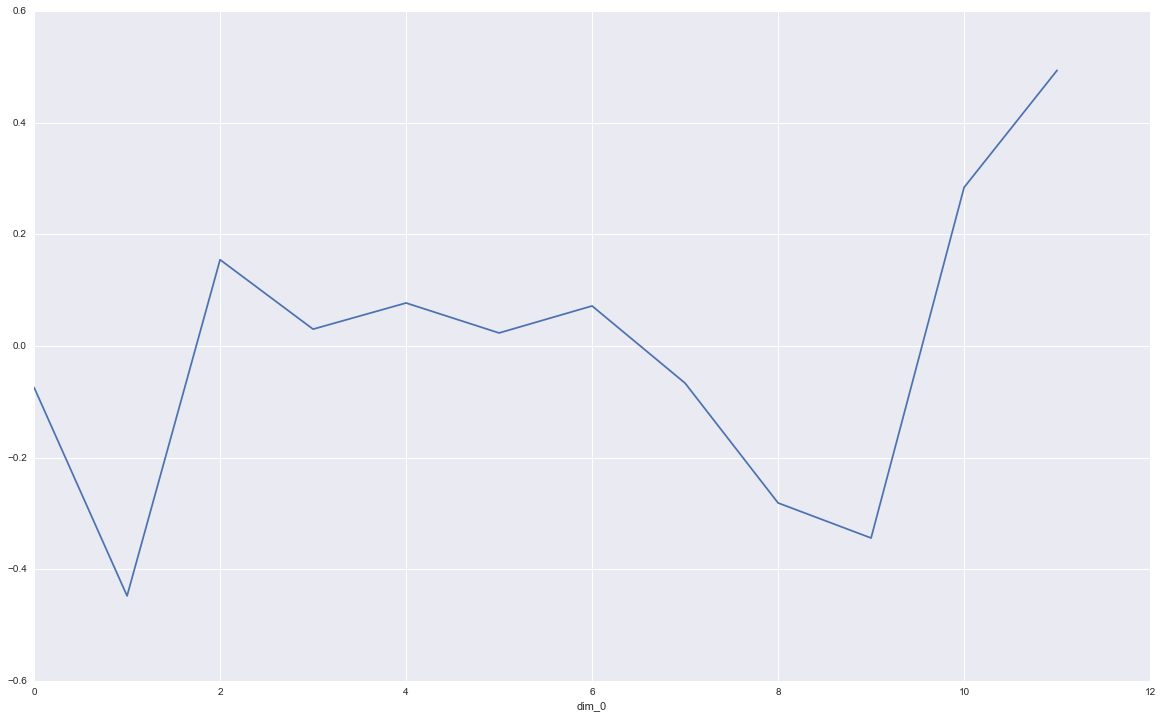

In [19]:
cor.plot()